### Image Mask Manipulation
Exported image masks from [ilastik](https://www.ilastik.org/) can be mapped together in python:

In [1]:
import sys
from fzl_utils import *
%matplotlib inline

In [ ]:
# reload functions when editing file
del sys.modules['fzl_utils']
from fzl_utils import *

---

In [2]:
# read in binary .npy export from ilastik
seg1 = seg.from_file(datafile='inputs/IHC_RegisteredToPreAF_pyramid_1_SimpleSegmentation.npy')
seg1.dims # check for dimensions of object in pixels

(776, 1254)

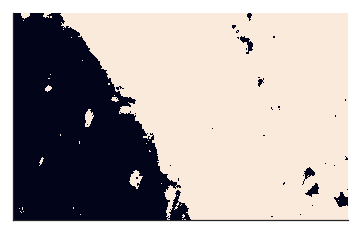

In [3]:
seg1.plot() # show the image

In [4]:
# segment IDs are 1 and 2, for the two labels trained in ilastik
print('Unique values in mask file: ' + str(seg1.seg_IDs))

Unique values in mask file: [1 2]


---

In [5]:
# now read in probabilities output from ilastik
prob1 = prob.from_file(datafile='inputs/IHC_RegisteredToPreAF_pyramid_1_Probabilities.npy')
prob1.dims

(2, 776, 1254)

In [6]:
# probability data is split into a dictionary where keys are segment IDs from [1,] 
print(prob1.data.keys())
prob1.seg_IDs
# (these should match)

dict_keys([1, 2])


array([1, 2], dtype=uint8)

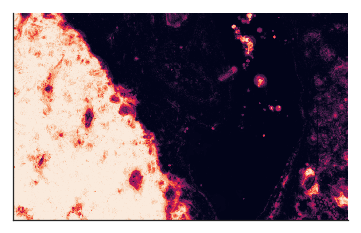

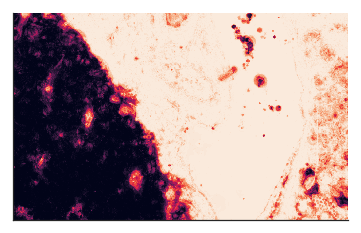

In [7]:
# we can now plot probabilities for both segment IDs, which in this case are inverses of one another since there's two of them
prob1.plot(seg_ID=1)
prob1.plot(seg_ID=2)

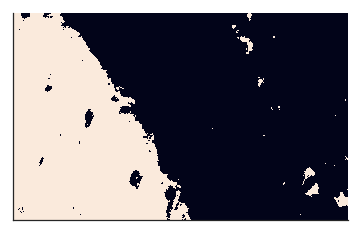

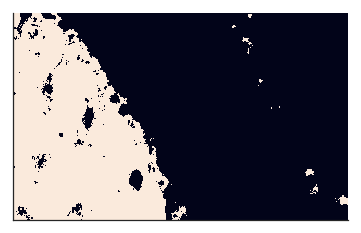

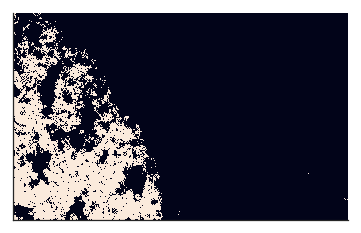

In [12]:
# threshold seg_ID 1 at different levels to look at output
prob1_1_50 = prob1.threshold(seg_ID=1, threshmax=0.5, plot_out=True)
prob1_1_75 = prob1.threshold(seg_ID=1, threshmax=0.75, plot_out=True)
prob1_1_98 = prob1.threshold(seg_ID=1, threshmax=0.98, plot_out=True)

---

In [13]:
# this is super ugly
for file in [x for x in os.walk('inputs')][0][2]:
    if '2' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob2 = prob.from_file(datafile='inputs/'+file)
        if 'SimpleSegmentation.npy' in file.split('_'):
            seg2 = seg.from_file(datafile='inputs/'+file)
    if '3' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob3 = prob.from_file(datafile='inputs/'+file)
        if 'SimpleSegmentation.npy' in file.split('_'):
            seg3 = seg.from_file(datafile='inputs/'+file)
    if '4' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob4 = prob.from_file(datafile='inputs/'+file)
        if 'SimpleSegmentation.npy' in file.split('_'):
            seg4 = seg.from_file(datafile='inputs/'+file)
    if '5' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob5 = prob.from_file(datafile='inputs/'+file)
        if 'SimpleSegmentation.npy' in file.split('_'):
            seg5 = seg.from_file(datafile='inputs/'+file)
    if '6' in file.split('_'):
        if 'Probabilities.npy' in file.split('_'):
            prob6 = prob.from_file(datafile='inputs/'+file)
        if 'SimpleSegmentation.npy' in file.split('_'):
            seg6 = seg.from_file(datafile='inputs/'+file)

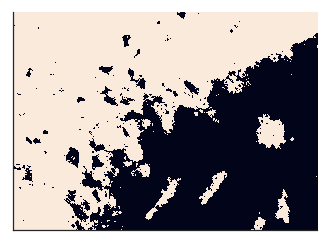

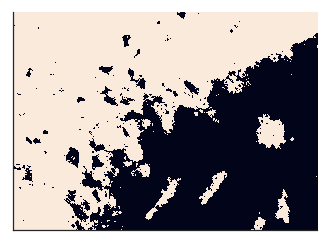

In [19]:
# looks like they use a default 0.5 threshold for simple segmentation in ilastik
prob2.threshold(seg_ID=2, threshmax=0.5, plot_out=True)
seg2.plot()

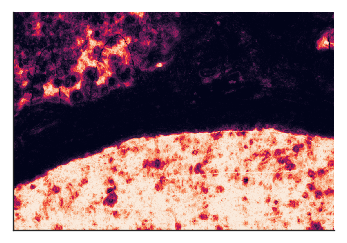

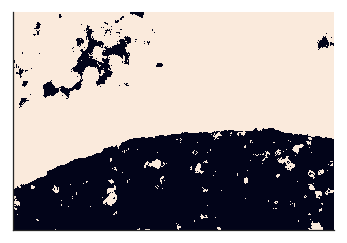

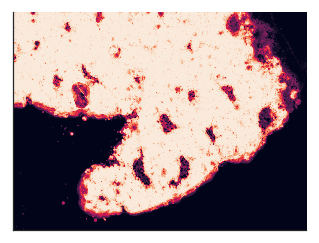

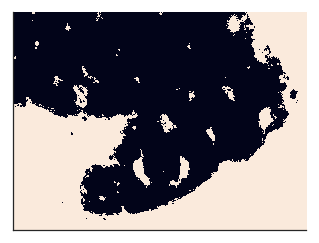

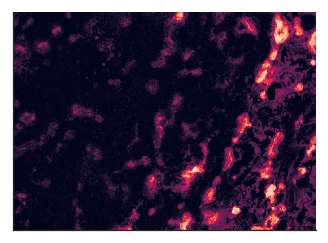

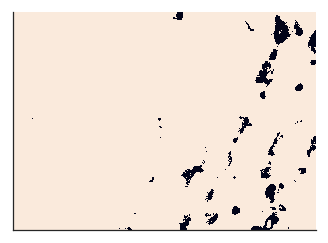

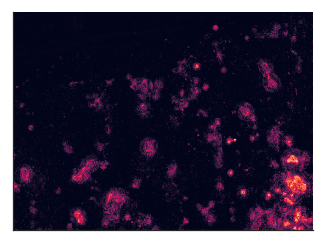

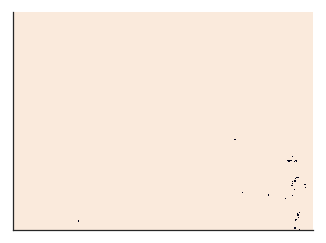

In [21]:
prob3.plot()
seg3.plot()
prob4.plot()
seg4.plot()
prob5.plot()
seg5.plot()
prob6.plot()
seg6.plot()

---

In [22]:
# test out pptk 
import pptk

In [23]:
x = np.random.rand(100, 3)
v = pptk.viewer(x)